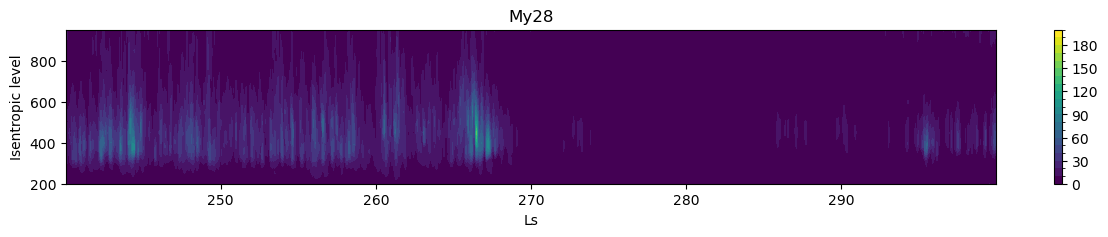

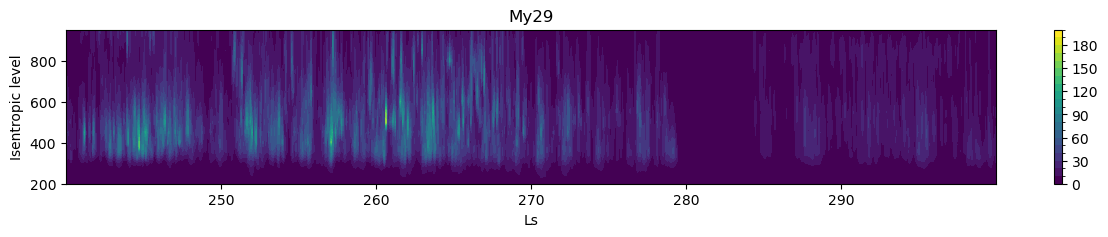

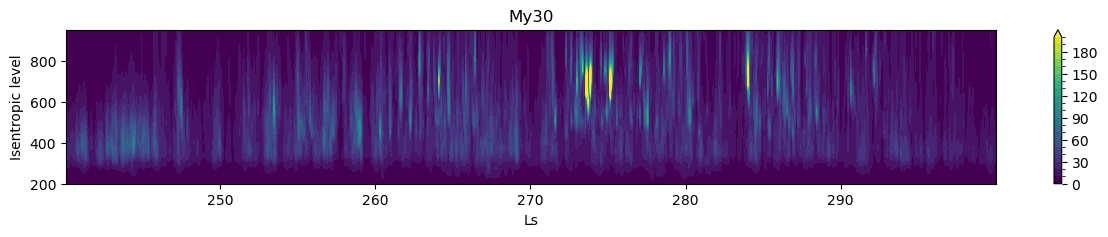

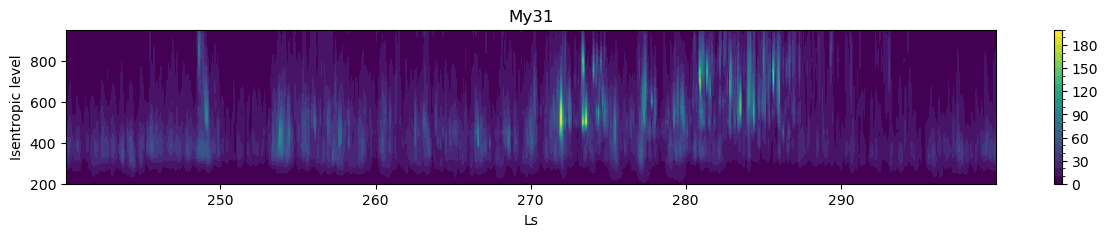

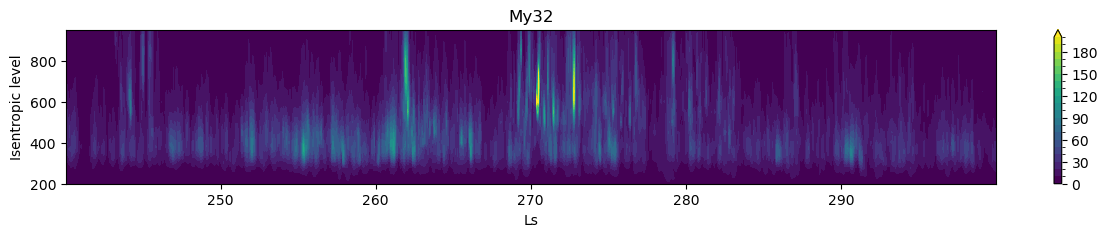

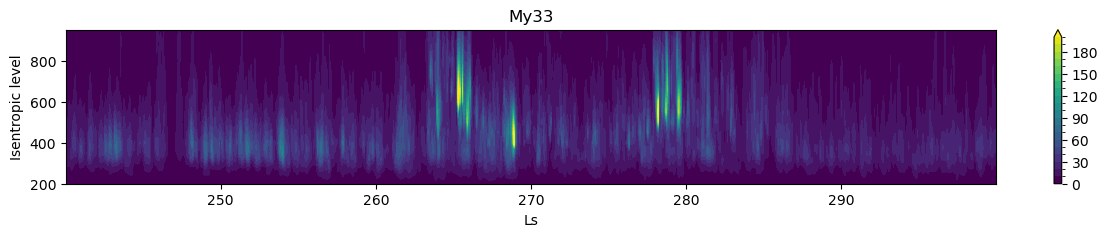

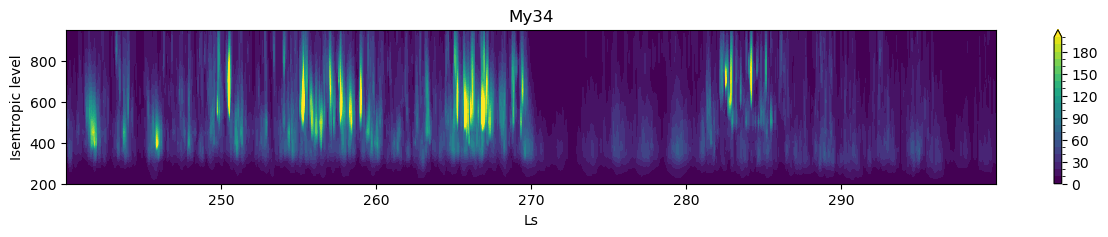

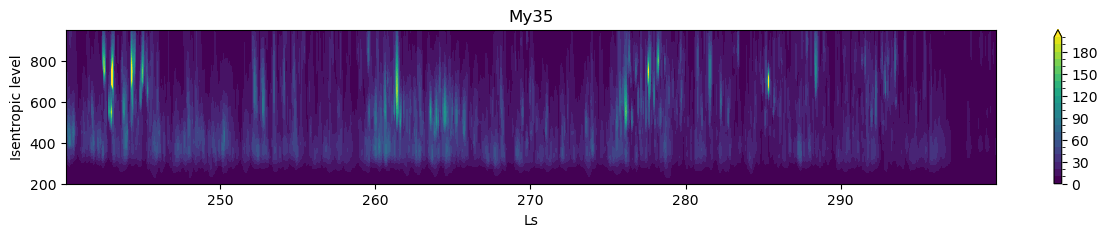

In [60]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

islev = 000

years = [28, 29, 30, 31, 32, 33, 34, 35]
path = '/disco/share/sh1293/OpenMARS_data/Eddy_enstrophy/'
i = 0
for year in years:
    da = xr.open_dataarray(path + 'lev%03d_my%02d.nc' %(islev, year))
    da = da.assign_coords({'MY':year})
    daw = da.where(240 <= da.Ls, drop = True).where(da.Ls <= 300, drop = True)
    plt.figure(figsize = (15, 2))
    daw.plot.contourf(x='Ls', levels = 21, vmin = 0, vmax = 200)
    plt.xlabel('Ls')
    plt.ylabel('Isentropic level')
    plt.title('My%02d' %(year))
    plt.savefig(path + '/Plots/isen_my%02d.pdf' %(year))
    #plt.
    #if i == 0:
    #    d = da
    #else:
    #    d = xr.concat([d, da], dim = 'time')
    #i+=1

#plt.figure(figsize = (24, 8))
#X, Y = np.meshgrid(d.time, d.level)
#plt.scatter(X, Y, c = d.values, cmap = 'RdBu_r', marker = 'x')
#plt.savefig(path + '/Plots/plot.pdf')

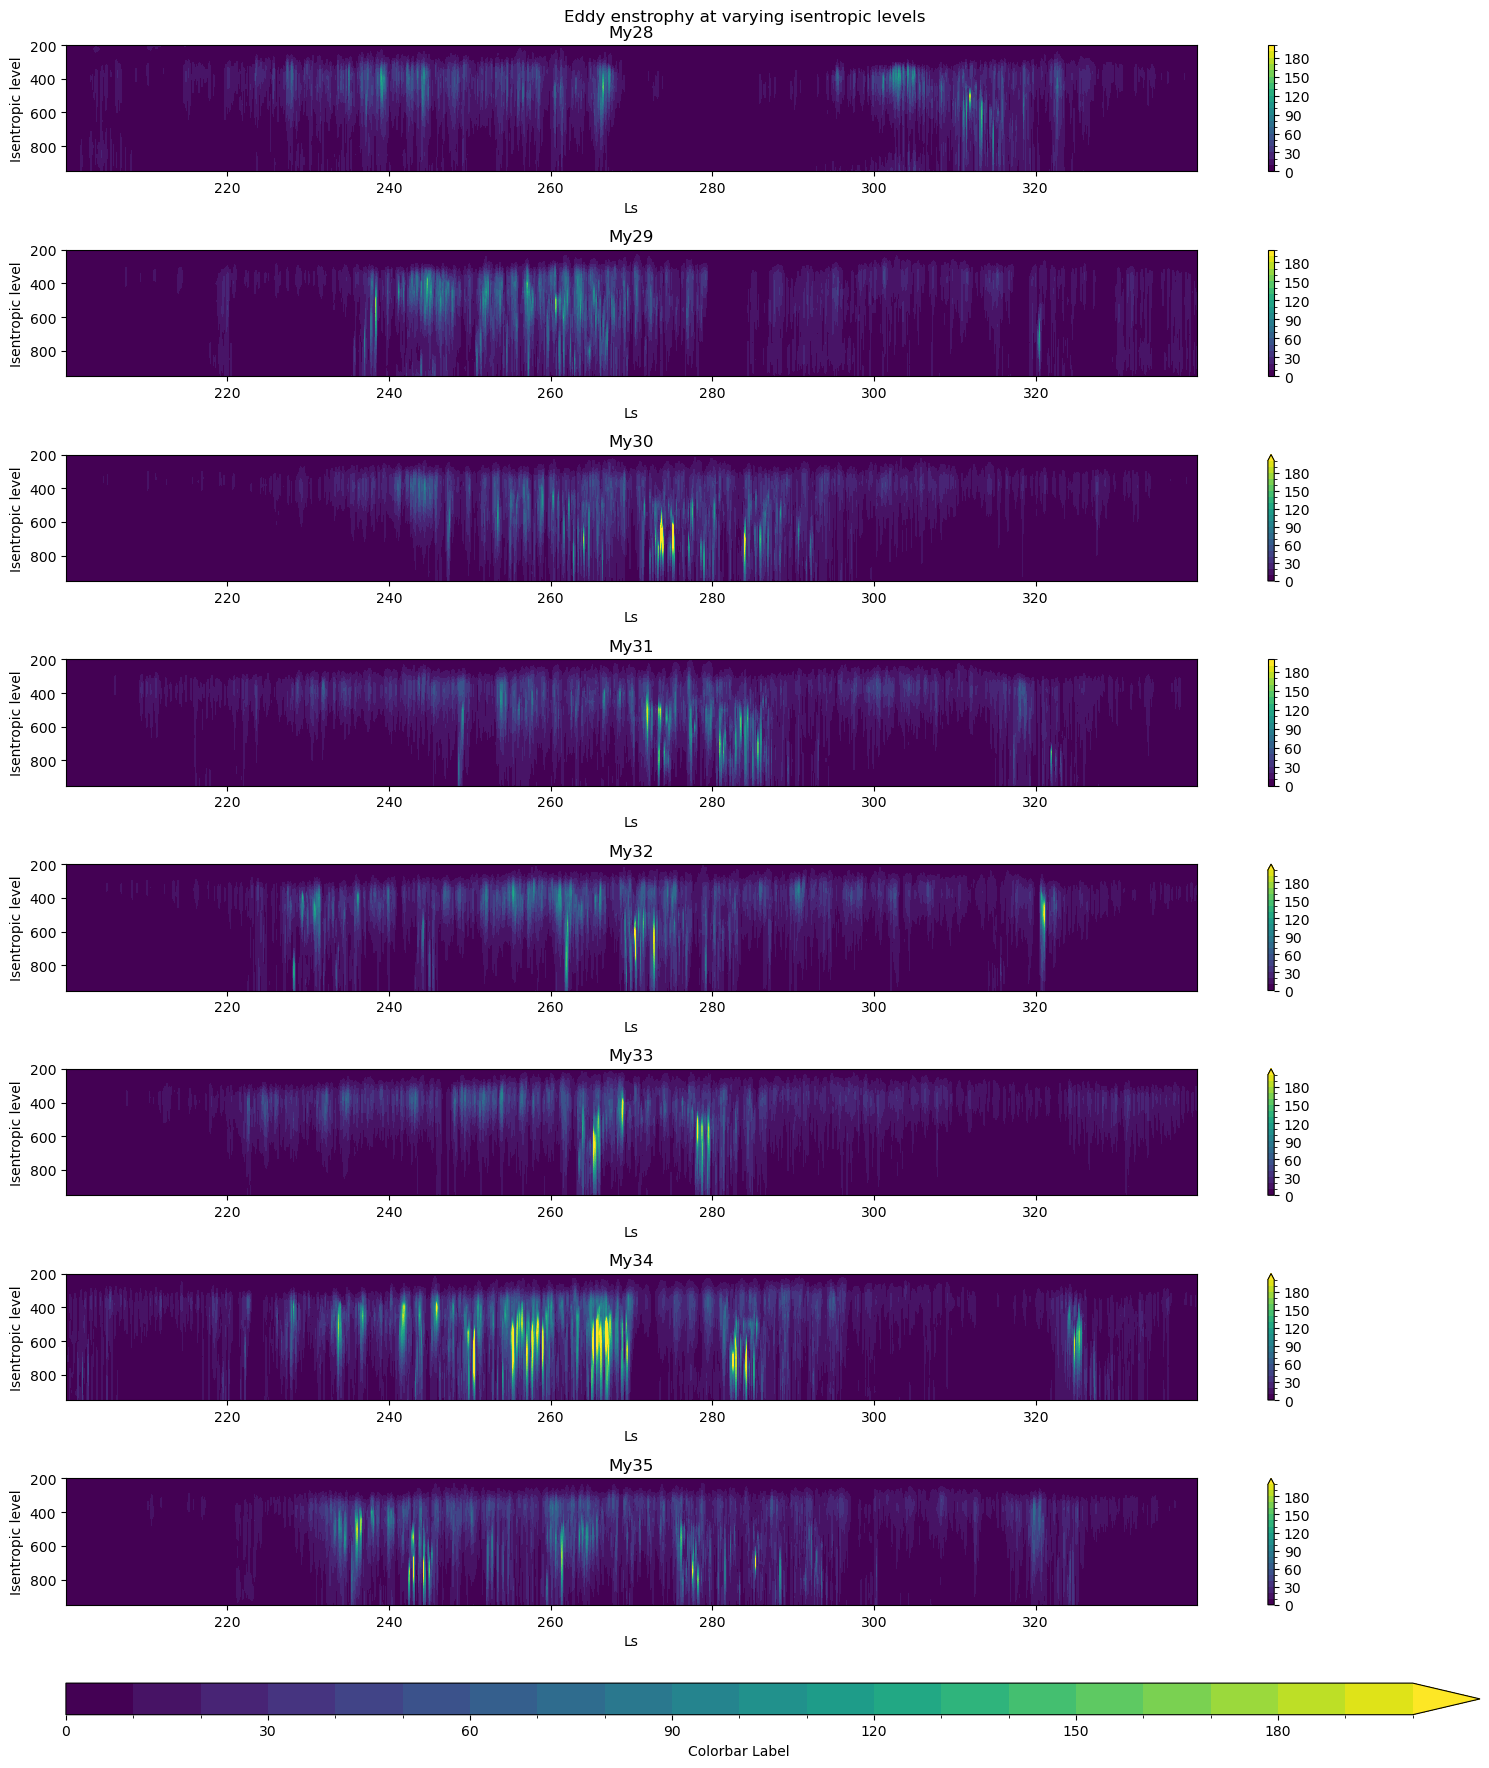

In [7]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

islev = 000

years = [28, 29, 30, 31, 32, 33, 34, 35]
path = '/disco/share/sh1293/OpenMARS_data/Eddy_enstrophy/'
i = 0
fig, axs = plt.subplots(9,1, figsize = (15,18), layout = 'tight', height_ratios = [1,1,1,1,1,1,1,1,0.25])
fig.suptitle('Eddy enstrophy at varying isentropic levels')
for year in years:
    da = xr.open_dataarray(path + 'lev%03d_my%02d.nc' %(islev, year))
    da = da.assign_coords({'MY':year})
    daw = da.where(200 <= da.Ls, drop = True).where(da.Ls <= 340, drop = True)
    plot = daw.plot.contourf(x='Ls', levels = 21, vmin = 0, vmax = 200, ax = axs[i])
    axs[i].set_xlabel('Ls')
    axs[i].set_ylabel('Isentropic level')
    axs[i].set_title('My%02d' %(year))
    axs[i].invert_yaxis()
    i+=1
cbar = fig.colorbar(plot, cax=axs[i], orientation='horizontal', shrink = 0.15)
cbar.set_label('Colorbar Label')
plt.tight_layout()
fig.subplots_adjust(top=0.96)
#plt.savefig(path + '/Plots/isen_all.pdf')

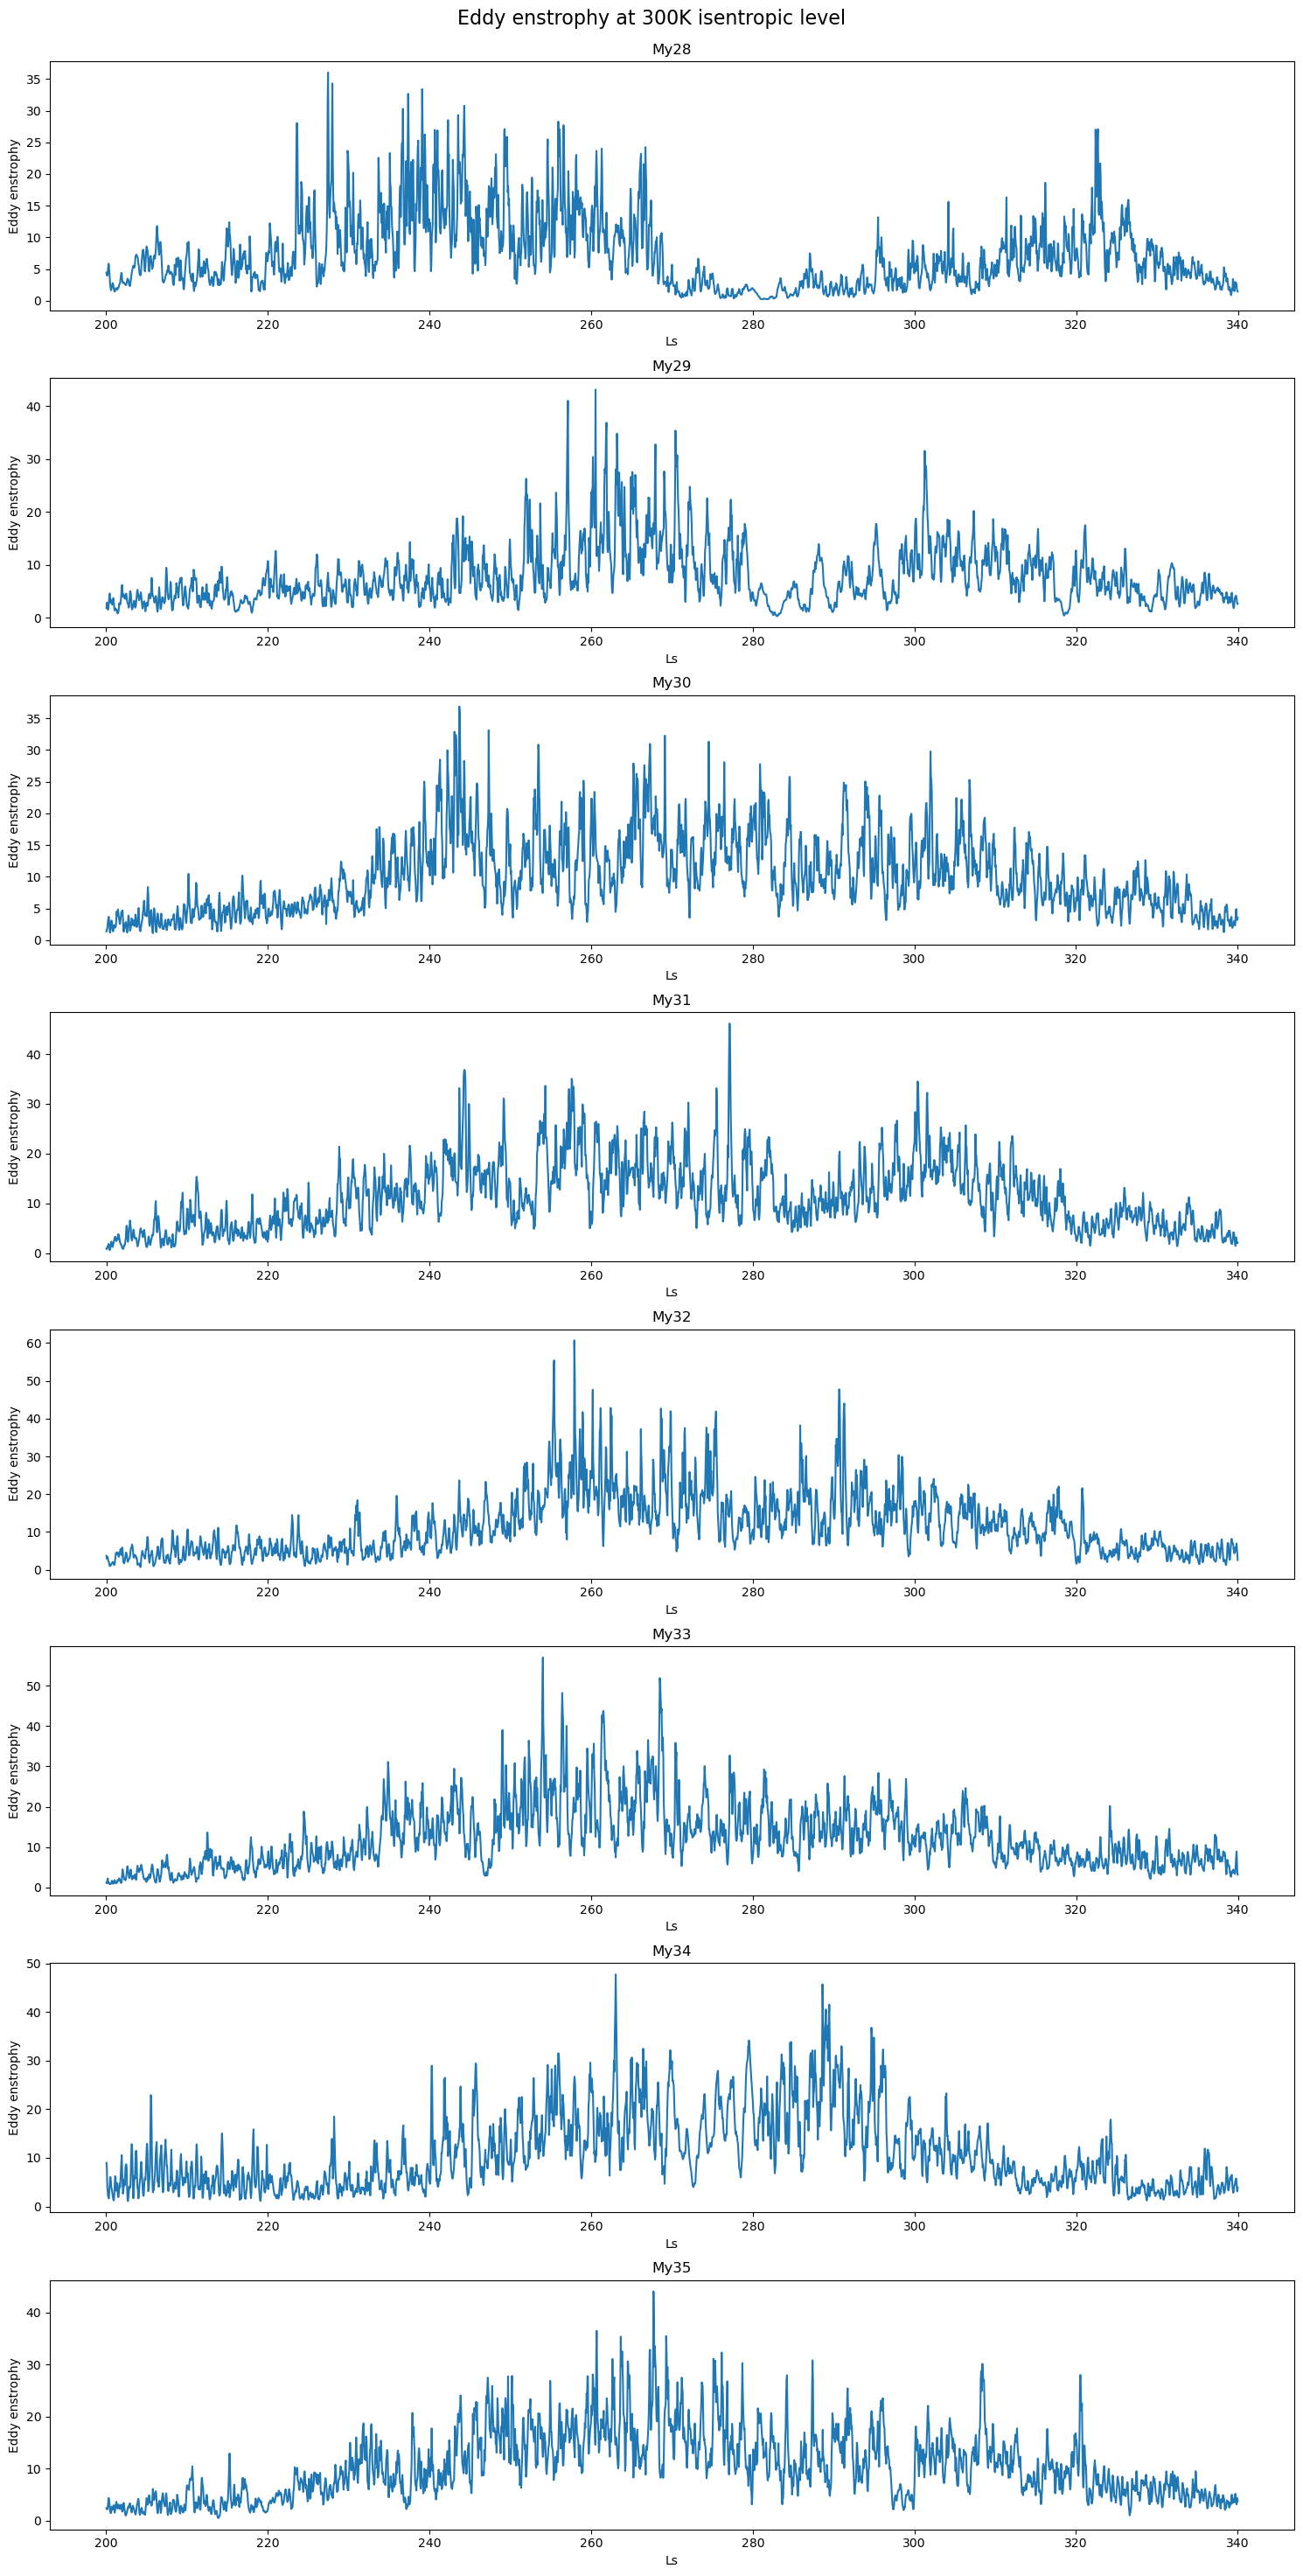

In [114]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

islev = 300

years = [28, 29, 30, 31, 32, 33, 34, 35]
path = '/disco/share/sh1293/OpenMARS_data/Eddy_enstrophy/'
i = 0
fig, axs = plt.subplots(8,1, figsize = (15,30))
fig.suptitle('Eddy enstrophy at 300K isentropic level', fontsize = 16)
for year in years:
    da = xr.open_dataarray(path + 'lev000_my%02d.nc' %(year))
    da = da.assign_coords({'MY':year})
    daw = da.where(200 <= da.Ls, drop = True).where(da.Ls <= 340, drop = True).where(da.level == islev, drop = True)
    plot = axs[i].plot(daw.Ls, daw.values)
    #plot = axs[i].scatter(daw.Ls, daw.values, marker = 'x', s = 0.5)
    axs[i].set_xlabel('Ls')
    axs[i].set_ylabel('Eddy enstrophy')
    axs[i].set_title('My%02d' %(year))
    i+=1
fig.tight_layout()
fig.subplots_adjust(top=0.96)
plt.savefig(path + '/Plots/lev%03d_scatter_all.pdf' %(islev))

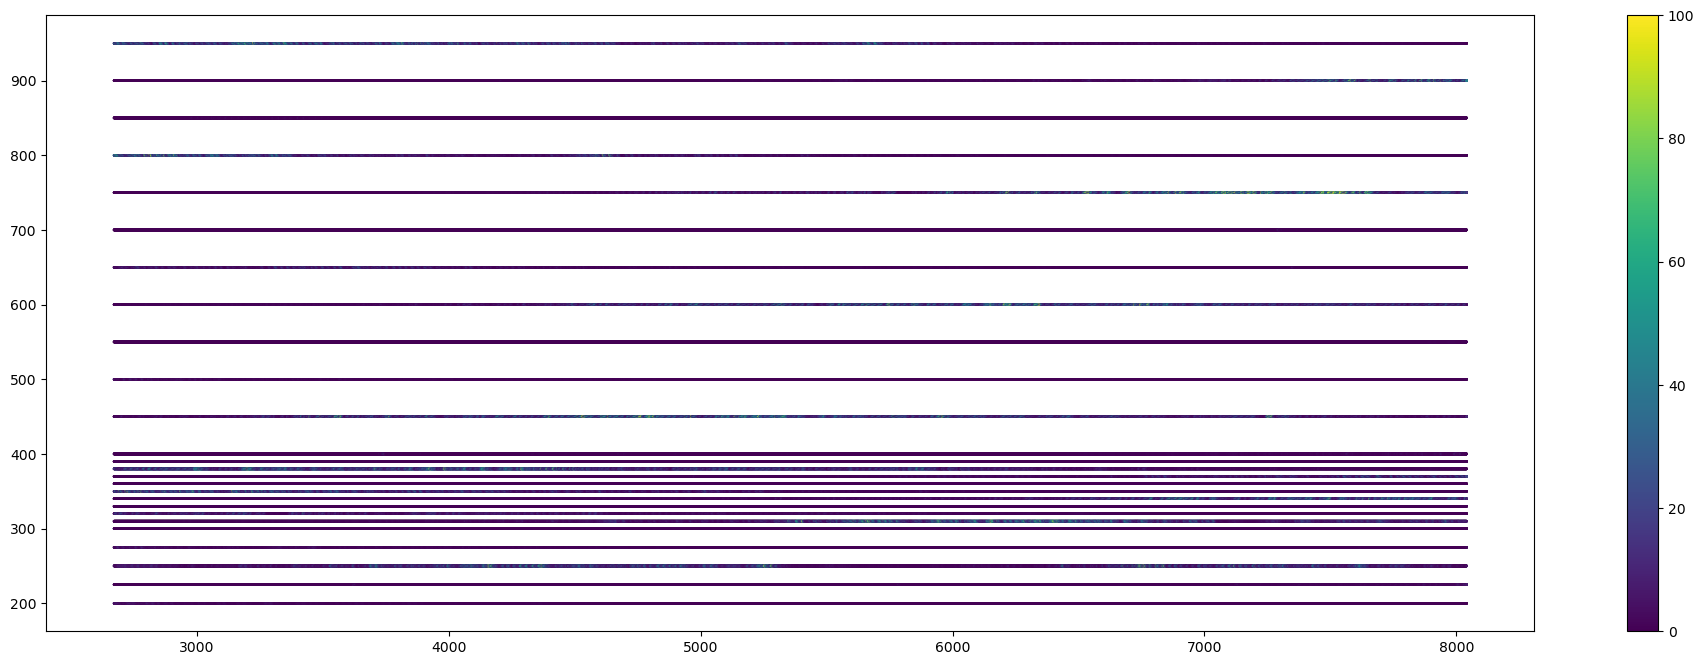

In [27]:
plt.figure(figsize = (24,8))
plt.scatter(X, Y, c = d.values, cmap = 'viridis', marker = 'o', s = 0.5, vmin = 0, vmax = 100)
plt.colorbar()

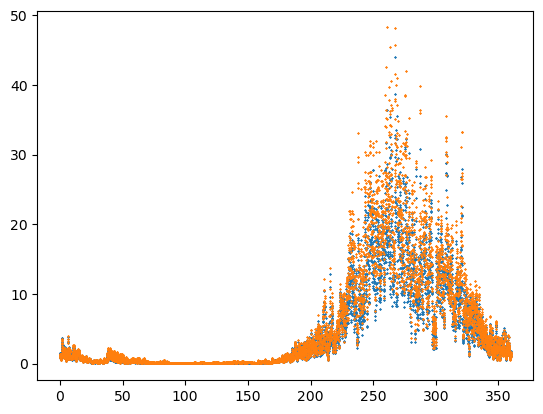

In [75]:
plt.scatter(da.Ls, da[:,4].values, marker = 'x', s = 0.5)
plt.scatter(da.Ls, da[:,5].values, marker = 'x', s = 0.5)

In [68]:
da.isel(da.level == 300)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()